In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
import pandas as pd
import numpy as np
np.random.seed(42)

import seaborn as sns
sns.set_style("white")
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

from hmmlearn import hmm
from sklearn.metrics import accuracy_score

# NASA Bearing Dataset Set 1
- Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
- No. of Files: 2,156
- No. of Channels: 8
- Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4; Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
- File Recording Interval: Every 10 minutes (except the first 43 files were taken every 5 minutes)
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

In [109]:
data1 = pd.read_csv('Data/data_rms_bearing_1.csv', header = None, sep=',')
data1.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [110]:
data1.describe()

,0,1,2,3,4,5,6,7
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.152867,0.153102,0.151212,0.150680,0.153969,0.150338,0.150380,0.150312
std,0.012501,0.012814,0.013307,0.012899,0.013333,0.013063,0.012918,0.012780
min,0.119746,0.117820,0.116974,0.115786,0.119502,0.116332,0.116370,0.117361
25%,0.149213,0.149268,0.147060,0.146744,0.150438,0.146495,0.146565,0.146482
50%,0.151007,0.151351,0.149639,0.148874,0.152409,0.148438,0.148448,0.148342
75%,0.156103,0.156384,0.154420,0.154026,0.158056,0.153872,0.153553,0.153606
max,0.326161,0.325306,0.377078,0.349152,0.322789,0.347876,0.358188,0.320975


# NASA Bearing Dataset Set 2
- Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
- No. of Files: 984
- No. of Channels: 4
- Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.
- File Recording Interval: Every 10 minutes
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

In [111]:
data2 = pd.read_csv('Data/data_rms_bearing_2.csv', header = None, sep=',')
data2.head()

,0,1,2,3
0,0.085298,0.084981,0.084102,0.084256
1,0.086073,0.086420,0.086052,0.085643
2,0.087299,0.086021,0.084995,0.087011
3,0.086777,0.087066,0.086819,0.087537
4,0.086714,0.086268,0.088115,0.085511


In [112]:
data2.describe()

,0,1,2,3
count,984.000000,984.000000,984.000000,984.000000
mean,0.095427,0.095462,0.095405,0.095439
std,0.027892,0.027912,0.027893,0.027823
min,0.001338,0.001425,0.001624,0.001836
25%,0.083653,0.083570,0.083553,0.083767
50%,0.085521,0.085588,0.085635,0.085679
75%,0.093572,0.094121,0.094041,0.093902
max,0.394807,0.393441,0.396800,0.395304


# NASA Bearing Dataset Set 3
- Recording Duration: March 4, 2004 09:27:46 to April 4, 2004 19:01:57
- No. of Files: 4,448
- No. of Channels: 4
- Channel Arrangement: Bearing1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing4 – Ch4;
- File Recording Interval: Every 10 minutes
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.

In [113]:
data3 = pd.read_csv('Data/data_rms_bearing_3.csv', header = None, sep=',')
data3.head()

,0,1,2,3
0,0.074970,0.074842,0.078904,0.075875
1,0.074782,0.075241,0.073887,0.071992
2,0.075055,0.076635,0.075566,0.073808
3,0.073029,0.075826,0.075278,0.078460
4,0.074622,0.073018,0.076055,0.075224


In [114]:
data3.describe()

,0,1,2,3
count,4448.000000,4448.000000,4448.000000,4448.000000
mean,0.069012,0.069008,0.068986,0.068962
std,0.001814,0.001823,0.001820,0.001843
min,0.064692,0.064929,0.064916,0.065028
25%,0.067937,0.067951,0.067890,0.067841
50%,0.068743,0.068778,0.068728,0.068694
75%,0.069701,0.069705,0.069659,0.069692
max,0.103010,0.102285,0.099878,0.093239


# Add Index Time

## Set 1

In [115]:
# create list minutes
minutes = []
start = 0
for t in range(len(data1)):
    # Every 10 minutes (except the first 43 files were taken every 5 minutes) 
    minutes.append(start)
    if t <= 43: 
        start += 5
    else:
        start += 10

In [116]:
# add into index dataframe
se = pd.Series(minutes)
data1.index = se.values
data1.index.name = 'Time'
data1.head()

,0,1,2,3,4,5,6,7
Time,,,,,,,,
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
5,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
10,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
15,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
20,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


## Set 2

In [117]:
# create list minutes
minutes = []
start = 0
for t in range(len(data2)):
    # Every 10 minutes 
    minutes.append(start)
    start += 10

In [118]:
# add into index dataframe
se = pd.Series(minutes)
data2.index = se.values
data2.index.name = 'Time'
data2.head()

,0,1,2,3
Time,,,,
0,0.085298,0.084981,0.084102,0.084256
10,0.086073,0.086420,0.086052,0.085643
20,0.087299,0.086021,0.084995,0.087011
30,0.086777,0.087066,0.086819,0.087537
40,0.086714,0.086268,0.088115,0.085511


## Set 3

In [119]:
# create list minutes
minutes = []
start = 0
for t in range(len(data3)):
    # Every 10 minutes 
    minutes.append(start)
    start += 10

In [120]:
# add into index dataframe
se = pd.Series(minutes)
data3.index = se.values
data3.index.name = 'Time'
data3.head()

,0,1,2,3
Time,,,,
0,0.074970,0.074842,0.078904,0.075875
10,0.074782,0.075241,0.073887,0.071992
20,0.075055,0.076635,0.075566,0.073808
30,0.073029,0.075826,0.075278,0.078460
40,0.074622,0.073018,0.076055,0.075224


# Draw Plot

## Set 1

[Text(0.5,0,'Time')]

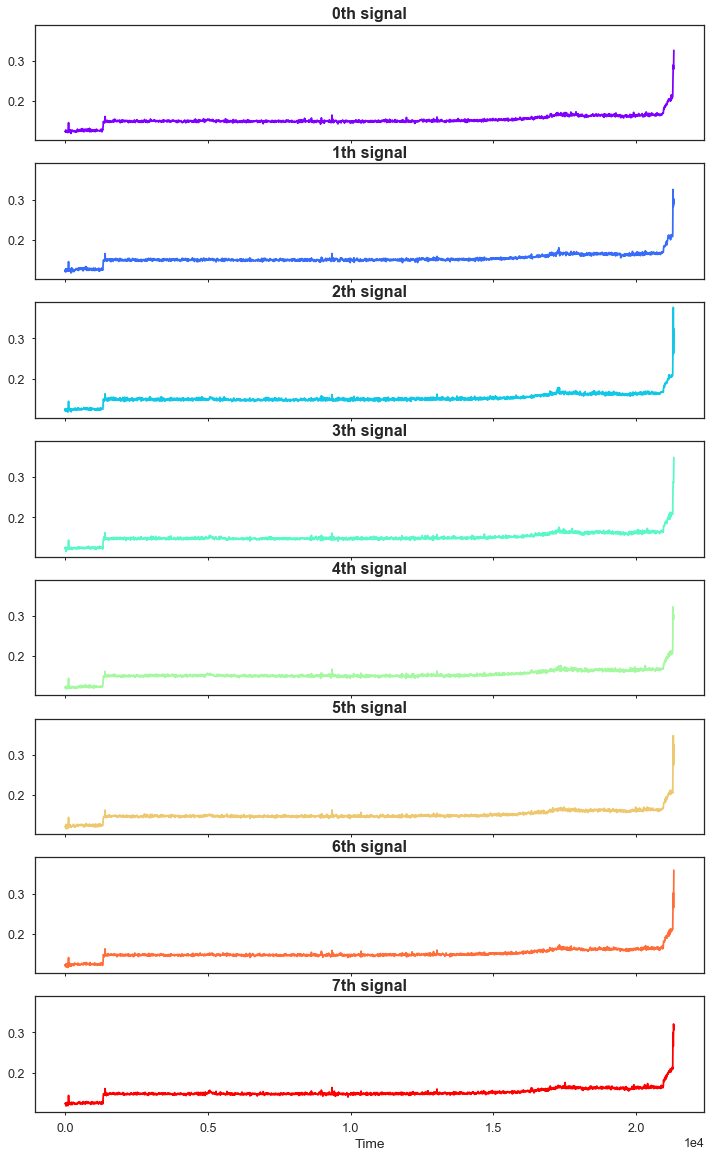

In [121]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(8, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 7))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data1.index == i
    ax.plot(data1.index,
            data1[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

## Set 2

[Text(0.5,0,'Time')]

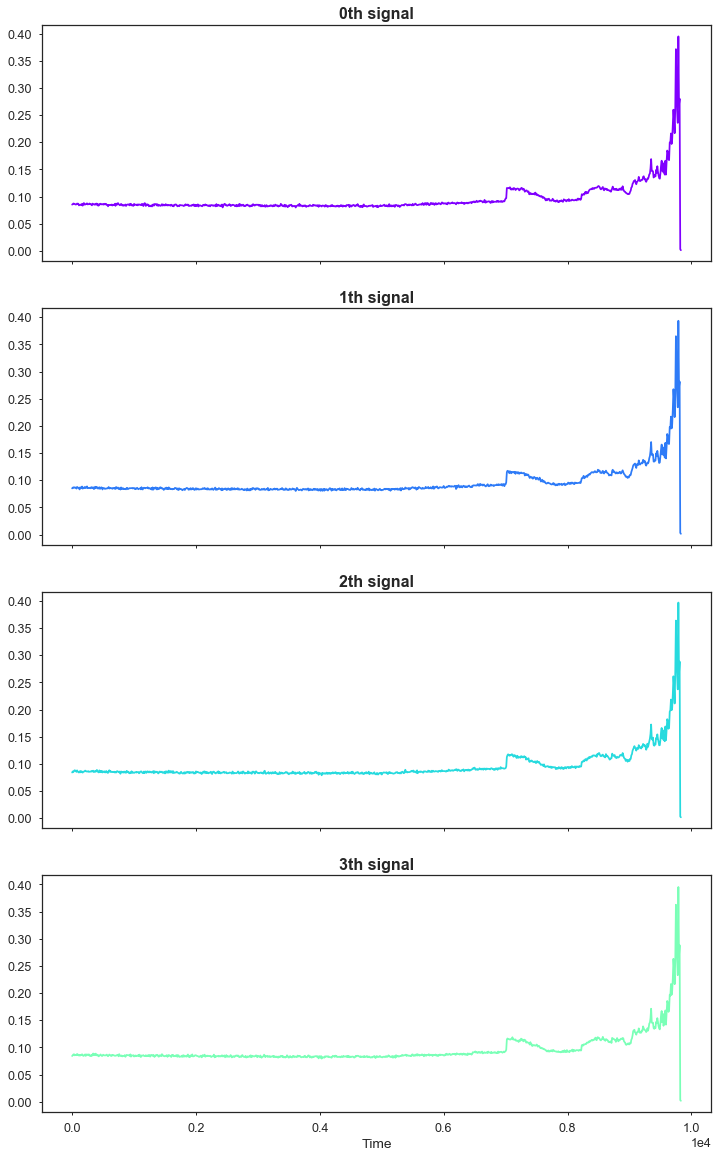

In [122]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 8))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data2.index == i
    ax.plot(data2.index,
            data2[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

## Set 3

[Text(0.5,0,'Time')]

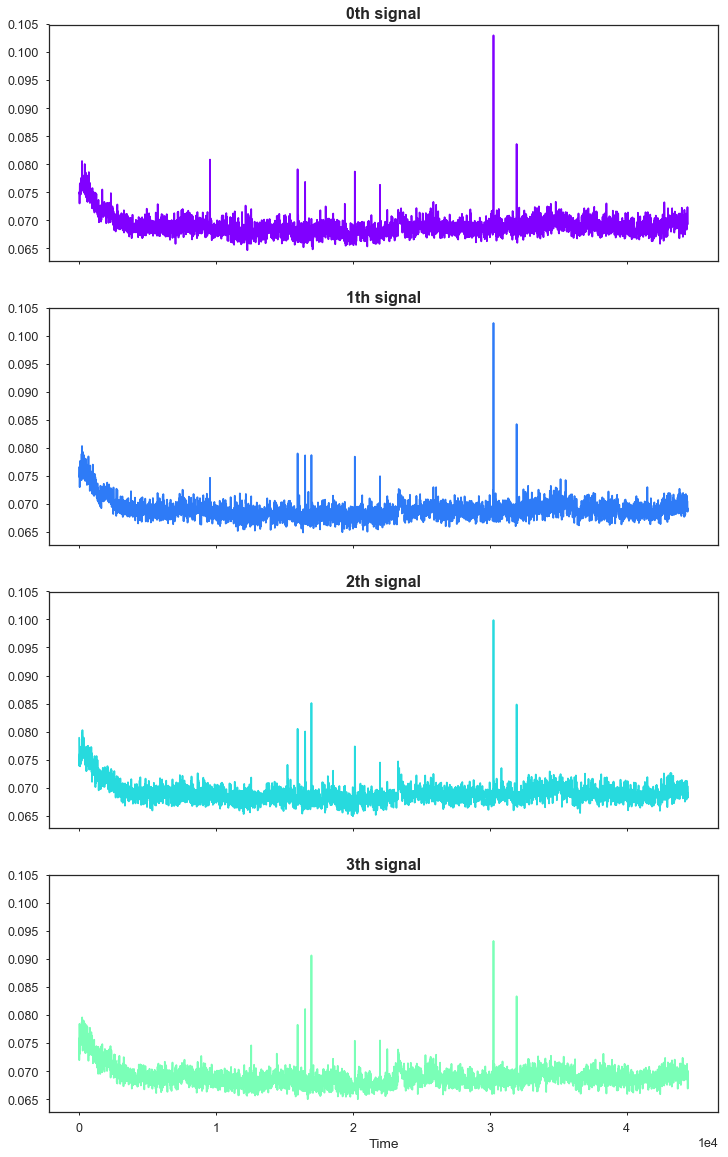

In [123]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 8))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data3.index == i
    ax.plot(data3.index,
            data3[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

# Preprocessing
Data yang masuk ke kategori outlier dibuang.

Pada data train 2, terdapat nilai akhir yang sangat rendah hingga berkisar di **0.001xxx**. Data tersebut dikategorikan sebagai outlier.

In [143]:
# data outlier terdapat pada row dengan indeks time 9820 dan 9830
data2.tail()

,0,1,2,3
Time,,,,
9790,0.394807,0.393441,0.396800,0.395304
9800,0.268741,0.271439,0.265041,0.267822
9810,0.280059,0.281508,0.288148,0.288197
9820,0.003283,0.003213,0.003138,0.003140
9830,0.001338,0.001425,0.001624,0.001836


In [144]:
# drop row index 9820 dan 9830
data2 = data2.drop([9820, 9830])
data2.tail()

,0,1,2,3
Time,,,,
9770,0.258288,0.262955,0.262295,0.260702
9780,0.235761,0.234216,0.237075,0.233080
9790,0.394807,0.393441,0.396800,0.395304
9800,0.268741,0.271439,0.265041,0.267822
9810,0.280059,0.281508,0.288148,0.288197


# Select data Train and Test

In [145]:
# data train
data_train1 = data1.copy()
data_train2 = data2[[0, 2, 3]].copy()
# data_train3 = data3.copy()

# data test
data_test = data2[[1]]

# Train GMMHMM Model with HMMLearn 

In [146]:
list_model = []

for channel in data_train1:
    model = hmm.GMMHMM(n_components=3, n_mix=2, covariance_type="full", n_iter=1000, random_state=42, tol=1e-5, verbose=True)
    model.fit(data_train1[channel].values.reshape(-1, 1))
    logprob = model.score(data_train1[channel].values.reshape(-1, 1))
    list_model.append([model, logprob])

for channel in data_train2:
    model = hmm.GMMHMM(n_components=3, n_mix=2, covariance_type="full", n_iter=1000, random_state=42, tol=1e-5, verbose=True)
    model.fit(data_train2[channel].values.reshape(-1, 1))
    logprob = model.score(data_train2[channel].values.reshape(-1, 1))
    list_model.append([model, logprob])

# for channel in data_train3:
#     model = hmm.GMMHMM(n_components=3, n_mix=2, covariance_type="full", n_iter=1000, random_state=30, tol=1e-5, verbose=True)
#     model.fit(data_train3[channel].values.reshape(-1, 1))
#     logprob = model.score(data_train3[channel].values.reshape(-1, 1))
#     list_model.append([model, logprob])

         1        4666.1368             +nan
         2        6460.7413       +1794.6046
         3        6990.1551        +529.4138
         4        7261.4450        +271.2899
         5        7742.2772        +480.8322
         6        8522.2066        +779.9294
         7        9151.8987        +629.6921
         8        9319.8577        +167.9590
         9        9332.2959         +12.4382
        10        9334.7286          +2.4327
        11        9337.0036          +2.2750
        12        9340.3349          +3.3314
        13        9346.4186          +6.0837
        14        9358.5970         +12.1785
        15        9397.8525         +39.2555
        16        9544.9234        +147.0708
        17        9670.5235        +125.6001
        18        9685.1721         +14.6486
        19        9688.4819          +3.3097
        20        9689.3747          +0.8929
        21        9689.8394          +0.4647
        22        9690.1109          +0.2715
        23

       207        9699.4170          +0.0002
       208        9699.4171          +0.0002
       209        9699.4173          +0.0002
       210        9699.4175          +0.0002
       211        9699.4177          +0.0002
       212        9699.4179          +0.0002
       213        9699.4180          +0.0002
       214        9699.4182          +0.0002
       215        9699.4183          +0.0002
       216        9699.4185          +0.0001
       217        9699.4186          +0.0001
       218        9699.4188          +0.0001
       219        9699.4189          +0.0001
       220        9699.4190          +0.0001
       221        9699.4191          +0.0001
       222        9699.4193          +0.0001
       223        9699.4194          +0.0001
       224        9699.4195          +0.0001
       225        9699.4196          +0.0001
       226        9699.4197          +0.0001
       227        9699.4198          +0.0001
       228        9699.4199          +0.0001
       229

       109        9289.0900          +0.0007
       110        9289.0905          +0.0006
       111        9289.0911          +0.0005
       112        9289.0915          +0.0005
       113        9289.0919          +0.0004
       114        9289.0923          +0.0004
       115        9289.0926          +0.0003
       116        9289.0929          +0.0003
       117        9289.0931          +0.0003
       118        9289.0933          +0.0002
       119        9289.0935          +0.0002
       120        9289.0937          +0.0002
       121        9289.0939          +0.0002
       122        9289.0941          +0.0002
       123        9289.0942          +0.0001
       124        9289.0943          +0.0001
       125        9289.0944          +0.0001
       126        9289.0946          +0.0001
       127        9289.0947          +0.0001
       128        9289.0948          +0.0001
       129        9289.0949          +0.0001
       130        9289.0949          +0.0001
       131

       304        9289.1035          +0.0000
       305        9289.1035          +0.0000
       306        9289.1036          +0.0000
       307        9289.1036          +0.0000
       308        9289.1036          +0.0000
       309        9289.1037          +0.0000
       310        9289.1037          +0.0000
       311        9289.1038          +0.0000
       312        9289.1038          +0.0000
       313        9289.1038          +0.0000
       314        9289.1039          +0.0000
       315        9289.1039          +0.0000
       316        9289.1040          +0.0000
       317        9289.1040          +0.0000
       318        9289.1040          +0.0000
       319        9289.1041          +0.0000
       320        9289.1041          +0.0000
       321        9289.1042          +0.0000
       322        9289.1042          +0.0000
       323        9289.1042          +0.0000
       324        9289.1043          +0.0000
       325        9289.1043          +0.0000
       326

       497        9289.1101          +0.0000
       498        9289.1101          +0.0000
       499        9289.1102          +0.0000
       500        9289.1102          +0.0000
       501        9289.1102          +0.0000
       502        9289.1102          +0.0000
       503        9289.1103          +0.0000
       504        9289.1103          +0.0000
       505        9289.1103          +0.0000
       506        9289.1104          +0.0000
       507        9289.1104          +0.0000
       508        9289.1104          +0.0000
       509        9289.1104          +0.0000
       510        9289.1105          +0.0000
       511        9289.1105          +0.0000
       512        9289.1105          +0.0000
       513        9289.1105          +0.0000
       514        9289.1106          +0.0000
       515        9289.1106          +0.0000
       516        9289.1106          +0.0000
       517        9289.1107          +0.0000
       518        9289.1107          +0.0000
       519

       695        9289.1146          +0.0000
       696        9289.1146          +0.0000
       697        9289.1146          +0.0000
       698        9289.1146          +0.0000
       699        9289.1146          +0.0000
       700        9289.1147          +0.0000
       701        9289.1147          +0.0000
       702        9289.1147          +0.0000
       703        9289.1147          +0.0000
       704        9289.1147          +0.0000
       705        9289.1148          +0.0000
       706        9289.1148          +0.0000
       707        9289.1148          +0.0000
       708        9289.1148          +0.0000
       709        9289.1148          +0.0000
       710        9289.1148          +0.0000
       711        9289.1149          +0.0000
       712        9289.1149          +0.0000
       713        9289.1149          +0.0000
       714        9289.1149          +0.0000
       715        9289.1149          +0.0000
       716        9289.1149          +0.0000
       717

       893        9289.1173          +0.0000
       894        9289.1173          +0.0000
       895        9289.1173          +0.0000
       896        9289.1173          +0.0000
       897        9289.1173          +0.0000
       898        9289.1174          +0.0000
       899        9289.1174          +0.0000
       900        9289.1174          +0.0000
       901        9289.1174          +0.0000
       902        9289.1174          +0.0000
       903        9289.1174          +0.0000
       904        9289.1174          +0.0000
       905        9289.1174          +0.0000
       906        9289.1174          +0.0000
       907        9289.1174          +0.0000
         1        4231.4509             +nan
         2        6235.2273       +2003.7765
         3        6942.6330        +707.4057
         4        7235.6916        +293.0586
         5        7620.7103        +385.0186
         6        8192.8445        +572.1342
         7        8901.2957        +708.4512
         8

       169        9447.3731          +0.0021
       170        9447.3752          +0.0020
       171        9447.3771          +0.0019
       172        9447.3789          +0.0018
       173        9447.3807          +0.0018
       174        9447.3824          +0.0017
       175        9447.3840          +0.0016
       176        9447.3855          +0.0015
       177        9447.3870          +0.0015
       178        9447.3883          +0.0014
       179        9447.3897          +0.0013
       180        9447.3909          +0.0013
       181        9447.3921          +0.0012
       182        9447.3932          +0.0011
       183        9447.3943          +0.0011
       184        9447.3954          +0.0010
       185        9447.3964          +0.0010
       186        9447.3973          +0.0009
       187        9447.3982          +0.0009
       188        9447.3990          +0.0009
       189        9447.3998          +0.0008
       190        9447.4006          +0.0008
       191

        88        9580.3297          +0.0117
        89        9580.3409          +0.0112
        90        9580.3518          +0.0108
        91        9580.3622          +0.0105
        92        9580.3723          +0.0101
        93        9580.3821          +0.0097
        94        9580.3915          +0.0094
        95        9580.4006          +0.0091
        96        9580.4094          +0.0088
        97        9580.4179          +0.0085
        98        9580.4261          +0.0082
        99        9580.4341          +0.0080
       100        9580.4419          +0.0077
       101        9580.4494          +0.0075
       102        9580.4566          +0.0073
       103        9580.4637          +0.0071
       104        9580.4706          +0.0069
       105        9580.4772          +0.0067
       106        9580.4837          +0.0065
       107        9580.4900          +0.0063
       108        9580.4962          +0.0061
       109        9580.5021          +0.0060
       110

       284        9580.7694          +0.0002
       285        9580.7695          +0.0002
       286        9580.7697          +0.0001
       287        9580.7698          +0.0001
       288        9580.7699          +0.0001
       289        9580.7701          +0.0001
       290        9580.7702          +0.0001
       291        9580.7704          +0.0001
       292        9580.7705          +0.0001
       293        9580.7706          +0.0001
       294        9580.7707          +0.0001
       295        9580.7709          +0.0001
       296        9580.7710          +0.0001
       297        9580.7711          +0.0001
       298        9580.7712          +0.0001
       299        9580.7713          +0.0001
       300        9580.7714          +0.0001
       301        9580.7716          +0.0001
       302        9580.7717          +0.0001
       303        9580.7718          +0.0001
       304        9580.7719          +0.0001
       305        9580.7720          +0.0001
       306

        72        9302.0650          +0.0191
        73        9302.0835          +0.0186
        74        9302.1016          +0.0180
        75        9302.1191          +0.0175
        76        9302.1361          +0.0170
        77        9302.1527          +0.0165
        78        9302.1687          +0.0161
        79        9302.1843          +0.0156
        80        9302.1994          +0.0151
        81        9302.2141          +0.0147
        82        9302.2284          +0.0143
        83        9302.2423          +0.0138
        84        9302.2557          +0.0134
        85        9302.2687          +0.0130
        86        9302.2814          +0.0126
        87        9302.2937          +0.0123
        88        9302.3056          +0.0119
        89        9302.3171          +0.0115
        90        9302.3283          +0.0112
        91        9302.3392          +0.0109
        92        9302.3497          +0.0105
        93        9302.3599          +0.0102
        94

       266        9302.6632          +0.0000
       267        9302.6632          +0.0000
       268        9302.6633          +0.0000
       269        9302.6633          +0.0000
       270        9302.6633          +0.0000
       271        9302.6633          +0.0000
       272        9302.6633          +0.0000
       273        9302.6634          +0.0000
       274        9302.6634          +0.0000
       275        9302.6634          +0.0000
       276        9302.6634          +0.0000
       277        9302.6634          +0.0000
       278        9302.6635          +0.0000
       279        9302.6635          +0.0000
       280        9302.6635          +0.0000
       281        9302.6635          +0.0000
       282        9302.6635          +0.0000
       283        9302.6635          +0.0000
       284        9302.6636          +0.0000
       285        9302.6636          +0.0000
       286        9302.6636          +0.0000
       287        9302.6636          +0.0000
       288

       166        9370.4570          +0.0013
       167        9370.4583          +0.0013
       168        9370.4596          +0.0013
       169        9370.4608          +0.0013
       170        9370.4621          +0.0013
       171        9370.4633          +0.0012
       172        9370.4646          +0.0012
       173        9370.4658          +0.0012
       174        9370.4670          +0.0012
       175        9370.4682          +0.0012
       176        9370.4694          +0.0012
       177        9370.4706          +0.0012
       178        9370.4718          +0.0012
       179        9370.4730          +0.0012
       180        9370.4742          +0.0012
       181        9370.4754          +0.0012
       182        9370.4765          +0.0012
       183        9370.4777          +0.0012
       184        9370.4789          +0.0012
       185        9370.4800          +0.0012
       186        9370.4812          +0.0011
       187        9370.4823          +0.0011
       188

       370        9370.6405          +0.0007
       371        9370.6412          +0.0007
       372        9370.6419          +0.0007
       373        9370.6425          +0.0007
       374        9370.6432          +0.0007
       375        9370.6439          +0.0007
       376        9370.6445          +0.0007
       377        9370.6452          +0.0007
       378        9370.6458          +0.0007
       379        9370.6465          +0.0007
       380        9370.6471          +0.0007
       381        9370.6478          +0.0007
       382        9370.6484          +0.0007
       383        9370.6491          +0.0006
       384        9370.6497          +0.0006
       385        9370.6504          +0.0006
       386        9370.6510          +0.0006
       387        9370.6517          +0.0006
       388        9370.6523          +0.0006
       389        9370.6530          +0.0006
       390        9370.6536          +0.0006
       391        9370.6542          +0.0006
       392

       573        9370.7484          +0.0004
       574        9370.7488          +0.0004
       575        9370.7492          +0.0004
       576        9370.7496          +0.0004
       577        9370.7500          +0.0004
       578        9370.7504          +0.0004
       579        9370.7508          +0.0004
       580        9370.7512          +0.0004
       581        9370.7516          +0.0004
       582        9370.7520          +0.0004
       583        9370.7524          +0.0004
       584        9370.7528          +0.0004
       585        9370.7532          +0.0004
       586        9370.7536          +0.0004
       587        9370.7540          +0.0004
       588        9370.7544          +0.0004
       589        9370.7548          +0.0004
       590        9370.7551          +0.0004
       591        9370.7555          +0.0004
       592        9370.7559          +0.0004
       593        9370.7563          +0.0004
       594        9370.7567          +0.0004
       595

       774        9370.8092          +0.0002
       775        9370.8094          +0.0002
       776        9370.8096          +0.0002
       777        9370.8098          +0.0002
       778        9370.8101          +0.0002
       779        9370.8103          +0.0002
       780        9370.8105          +0.0002
       781        9370.8107          +0.0002
       782        9370.8109          +0.0002
       783        9370.8111          +0.0002
       784        9370.8113          +0.0002
       785        9370.8115          +0.0002
       786        9370.8117          +0.0002
       787        9370.8118          +0.0002
       788        9370.8120          +0.0002
       789        9370.8122          +0.0002
       790        9370.8124          +0.0002
       791        9370.8126          +0.0002
       792        9370.8128          +0.0002
       793        9370.8130          +0.0002
       794        9370.8132          +0.0002
       795        9370.8134          +0.0002
       796

       977        9370.8368          +0.0001
       978        9370.8369          +0.0001
       979        9370.8369          +0.0001
       980        9370.8370          +0.0001
       981        9370.8371          +0.0001
       982        9370.8372          +0.0001
       983        9370.8372          +0.0001
       984        9370.8373          +0.0001
       985        9370.8374          +0.0001
       986        9370.8375          +0.0001
       987        9370.8375          +0.0001
       988        9370.8376          +0.0001
       989        9370.8377          +0.0001
       990        9370.8378          +0.0001
       991        9370.8378          +0.0001
       992        9370.8379          +0.0001
       993        9370.8380          +0.0001
       994        9370.8381          +0.0001
       995        9370.8381          +0.0001
       996        9370.8382          +0.0001
       997        9370.8383          +0.0001
       998        9370.8383          +0.0001
       999

       169        9702.2083          +0.0007
       170        9702.2090          +0.0007
       171        9702.2097          +0.0007
       172        9702.2104          +0.0007
       173        9702.2110          +0.0006
       174        9702.2116          +0.0006
       175        9702.2122          +0.0006
       176        9702.2127          +0.0006
       177        9702.2133          +0.0005
       178        9702.2138          +0.0005
       179        9702.2143          +0.0005
       180        9702.2148          +0.0005
       181        9702.2152          +0.0005
       182        9702.2157          +0.0004
       183        9702.2161          +0.0004
       184        9702.2165          +0.0004
       185        9702.2169          +0.0004
       186        9702.2173          +0.0004
       187        9702.2176          +0.0004
       188        9702.2180          +0.0004
       189        9702.2183          +0.0003
       190        9702.2187          +0.0003
       191

        58        9374.6990          +0.0201
        59        9374.7181          +0.0191
        60        9374.7364          +0.0182
        61        9374.7537          +0.0174
        62        9374.7702          +0.0165
        63        9374.7860          +0.0157
        64        9374.8010          +0.0150
        65        9374.8153          +0.0143
        66        9374.8288          +0.0136
        67        9374.8418          +0.0129
        68        9374.8541          +0.0123
        69        9374.8658          +0.0117
        70        9374.8770          +0.0112
        71        9374.8876          +0.0106
        72        9374.8978          +0.0101
        73        9374.9074          +0.0096
        74        9374.9165          +0.0092
        75        9374.9253          +0.0087
        76        9374.9336          +0.0083
        77        9374.9415          +0.0079
        78        9374.9490          +0.0075
        79        9374.9561          +0.0071
        80

        62        4107.0018          +0.0146
        63        4107.0179          +0.0161
        64        4107.0359          +0.0180
        65        4107.0564          +0.0205
        66        4107.0803          +0.0238
        67        4107.1085          +0.0282
        68        4107.1428          +0.0343
        69        4107.1857          +0.0430
        70        4107.2413          +0.0556
        71        4107.3160          +0.0747
        72        4107.4210          +0.1050
        73        4107.5768          +0.1558
        74        4107.8232          +0.2464
        75        4108.2452          +0.4220
        76        4109.0438          +0.7986
        77        4110.7518          +1.7079
        78        4114.9052          +4.1534
        79        4125.2840         +10.3788
        80        4143.2870         +18.0031
        81        4159.5878         +16.3008
        82        4170.2383         +10.6505
        83        4174.1400          +3.9017
        84

       260        4219.2068          +0.0045
       261        4219.2113          +0.0045
       262        4219.2157          +0.0044
       263        4219.2201          +0.0044
       264        4219.2244          +0.0043
       265        4219.2287          +0.0043
       266        4219.2330          +0.0043
       267        4219.2372          +0.0042
       268        4219.2414          +0.0042
       269        4219.2456          +0.0041
       270        4219.2497          +0.0041
       271        4219.2537          +0.0041
       272        4219.2578          +0.0040
       273        4219.2618          +0.0040
       274        4219.2657          +0.0039
       275        4219.2696          +0.0039
       276        4219.2735          +0.0039
       277        4219.2773          +0.0038
       278        4219.2811          +0.0038
       279        4219.2848          +0.0037
       280        4219.2885          +0.0037
       281        4219.2922          +0.0037
       282

       472        4219.5142          +0.0001
       473        4219.5143          +0.0001
       474        4219.5143          +0.0001
       475        4219.5144          +0.0001
       476        4219.5145          +0.0001
       477        4219.5146          +0.0001
       478        4219.5146          +0.0001
       479        4219.5147          +0.0001
       480        4219.5147          +0.0001
       481        4219.5148          +0.0001
       482        4219.5149          +0.0001
       483        4219.5149          +0.0001
       484        4219.5150          +0.0001
       485        4219.5150          +0.0001
       486        4219.5151          +0.0001
       487        4219.5151          +0.0001
       488        4219.5152          +0.0000
       489        4219.5152          +0.0000
       490        4219.5153          +0.0000
       491        4219.5153          +0.0000
       492        4219.5154          +0.0000
       493        4219.5154          +0.0000
       494

       122        4255.3472          +0.0001
       123        4255.3473          +0.0001
       124        4255.3474          +0.0001
       125        4255.3475          +0.0001
       126        4255.3476          +0.0001
       127        4255.3477          +0.0001
       128        4255.3478          +0.0001
       129        4255.3479          +0.0001
       130        4255.3480          +0.0001
       131        4255.3481          +0.0001
       132        4255.3481          +0.0001
       133        4255.3482          +0.0001
       134        4255.3483          +0.0001
       135        4255.3484          +0.0001
       136        4255.3485          +0.0001
       137        4255.3486          +0.0001
       138        4255.3486          +0.0001
       139        4255.3487          +0.0001
       140        4255.3488          +0.0001
       141        4255.3489          +0.0001
       142        4255.3490          +0.0001
       143        4255.3490          +0.0001
       144

        29        4164.0640          +0.3053
        30        4164.3670          +0.3030
        31        4164.6729          +0.3059
        32        4164.9839          +0.3110
        33        4165.3010          +0.3171
        34        4165.6249          +0.3239
        35        4165.9562          +0.3313
        36        4166.2952          +0.3390
        37        4166.6422          +0.3470
        38        4166.9970          +0.3548
        39        4167.3592          +0.3621
        40        4167.7275          +0.3683
        41        4168.1003          +0.3728
        42        4168.4750          +0.3747
        43        4168.8484          +0.3734
        44        4169.2164          +0.3680
        45        4169.5742          +0.3579
        46        4169.9170          +0.3427
        47        4170.2394          +0.3225
        48        4170.5369          +0.2975
        49        4170.8054          +0.2686
        50        4171.0424          +0.2370
        51

       226        4290.5934          +0.0008
       227        4290.5942          +0.0008
       228        4290.5950          +0.0008
       229        4290.5958          +0.0008
       230        4290.5965          +0.0008
       231        4290.5973          +0.0008
       232        4290.5981          +0.0008
       233        4290.5989          +0.0008
       234        4290.5997          +0.0008
       235        4290.6005          +0.0008
       236        4290.6012          +0.0008
       237        4290.6020          +0.0008
       238        4290.6028          +0.0008
       239        4290.6036          +0.0008
       240        4290.6043          +0.0008
       241        4290.6051          +0.0008
       242        4290.6059          +0.0008
       243        4290.6067          +0.0008
       244        4290.6074          +0.0008
       245        4290.6082          +0.0008
       246        4290.6090          +0.0008
       247        4290.6097          +0.0008
       248

       409        4290.7692          +0.0017
       410        4290.7709          +0.0017
       411        4290.7727          +0.0017
       412        4290.7744          +0.0018
       413        4290.7762          +0.0018
       414        4290.7780          +0.0018
       415        4290.7798          +0.0018
       416        4290.7817          +0.0018
       417        4290.7835          +0.0019
       418        4290.7854          +0.0019
       419        4290.7873          +0.0019
       420        4290.7892          +0.0019
       421        4290.7912          +0.0020
       422        4290.7932          +0.0020
       423        4290.7952          +0.0020
       424        4290.7972          +0.0020
       425        4290.7992          +0.0020
       426        4290.8013          +0.0021
       427        4290.8034          +0.0021
       428        4290.8055          +0.0021
       429        4290.8077          +0.0021
       430        4290.8099          +0.0022
       431

       592        4291.2128          +0.0009
       593        4291.2136          +0.0009
       594        4291.2145          +0.0009
       595        4291.2154          +0.0009
       596        4291.2162          +0.0008
       597        4291.2171          +0.0008
       598        4291.2179          +0.0008
       599        4291.2187          +0.0008
       600        4291.2195          +0.0008
       601        4291.2202          +0.0008
       602        4291.2210          +0.0008
       603        4291.2217          +0.0007
       604        4291.2225          +0.0007
       605        4291.2232          +0.0007
       606        4291.2239          +0.0007
       607        4291.2246          +0.0007
       608        4291.2253          +0.0007
       609        4291.2259          +0.0007
       610        4291.2266          +0.0007
       611        4291.2272          +0.0006
       612        4291.2279          +0.0006
       613        4291.2285          +0.0006
       614

       784        4291.2672          +0.0001
       785        4291.2672          +0.0001
       786        4291.2673          +0.0001
       787        4291.2674          +0.0001
       788        4291.2675          +0.0001
       789        4291.2675          +0.0001
       790        4291.2676          +0.0001
       791        4291.2677          +0.0001
       792        4291.2678          +0.0001
       793        4291.2678          +0.0001
       794        4291.2679          +0.0001
       795        4291.2680          +0.0001
       796        4291.2680          +0.0001
       797        4291.2681          +0.0001
       798        4291.2682          +0.0001
       799        4291.2682          +0.0001
       800        4291.2683          +0.0001
       801        4291.2684          +0.0001
       802        4291.2684          +0.0001
       803        4291.2685          +0.0001
       804        4291.2686          +0.0001
       805        4291.2686          +0.0001
       806

       979        4291.2763          +0.0000
       980        4291.2763          +0.0000
       981        4291.2763          +0.0000
       982        4291.2764          +0.0000
       983        4291.2764          +0.0000
       984        4291.2764          +0.0000
       985        4291.2765          +0.0000
       986        4291.2765          +0.0000
       987        4291.2766          +0.0000
       988        4291.2766          +0.0000
       989        4291.2766          +0.0000
       990        4291.2767          +0.0000
       991        4291.2767          +0.0000
       992        4291.2767          +0.0000
       993        4291.2768          +0.0000
       994        4291.2768          +0.0000
       995        4291.2768          +0.0000
       996        4291.2769          +0.0000
       997        4291.2769          +0.0000
       998        4291.2769          +0.0000
       999        4291.2770          +0.0000
      1000        4291.2770          +0.0000


In [147]:
# mencari logprob tertinggi
for index, model in enumerate(list_model):
    model, logprob = model[0], model[1]
    print("logprob data ", index, ":", logprob)

logprob data  0 : 9699.422159410267
logprob data  1 : 9289.117458376531
logprob data  2 : 9447.41573278614
logprob data  3 : 9580.77597299297
logprob data  4 : 9302.663676371634
logprob data  5 : 9370.838548303924
logprob data  6 : 9702.228404886277
logprob data  7 : 9375.093275616844
logprob data  8 : 4219.516601420083
logprob data  9 : 4255.354278250438
logprob data  10 : 4291.277042060405


In [148]:
# best models with the highest logprob
best_model = list_model[6]
model, logprob = best_model[0], best_model[1]

In [149]:
# log probability
logprob

9702.228404886277

In [150]:
# start probability
model.startprob_

array([0., 1., 0.])

In [151]:
# transition matrix
model.transmat_

array([[9.99318893e-001, 0.00000000e+000, 6.81107261e-004],
       [5.20648446e-003, 9.94793516e-001, 0.00000000e+000],
       [7.74469614e-196, 2.02136222e-003, 9.97978638e-001]])

In [152]:
# mixture's weight
model.weights_

array([[0.67687941, 0.32312059],
       [0.79177442, 0.20822558],
       [0.7045374 , 0.2954626 ]])

In [153]:
# means
model.means_

array([[[0.14740636],
        [0.14930528]],

       [[0.12399797],
        [0.20232225]],

       [[0.16087779],
        [0.16236029]]])

In [154]:
# covars
model.covars_

array([[[[2.46614260e-06]],

        [[7.97309681e-06]]],


       [[[4.76396162e-06]],

        [[1.56421879e-03]]],


       [[[1.66590427e-05]],

        [[2.71727455e-06]]]])

# Test

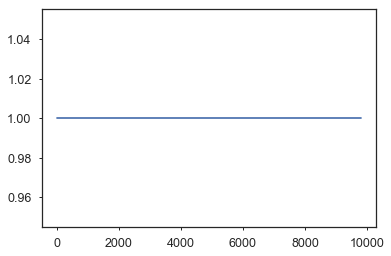

In [155]:
# mendefinisikan data x y graph
x = data_train2.index
y = model.predict(data_test.values.reshape(-1, 1))
plt.plot(x, y)
plt.show()

In [81]:
# num_state = {0: [], 1: [], 2:[]}
# time_state = {0: [], 1: [], 2: []}

# previous = None
# start_time = 0
# for time_x, state_y in zip(x, y):
#     if previous is None:
#         previous = state_y
#         start_time = time_x
        
#     if previous != state_y:
#         time_state[previous].append((start_time, time_x))
#         start_time = time_x
        
#     previous = state_y

In [82]:
# time_state

In [83]:
# len_time = {0: [], 1: [], 2: []}
# for data in time_state.items():
#     state, time = data[0], data[1]
    
#     decrease_time = []
#     for t in time:
#         decrease_time.append(t[1]-t[0])
        
#     len_time[state].append((len(time), decrease_time))

In [84]:
# len_time

In [85]:
# mean_std = {0: [], 1: [], 2: []}
# for data in len_time.items():
#     state, time = data[0], data[1]
#     mean_std[state].append((np.mean(time[0][1]), np.std(time[0][1])))

In [86]:
# mean_std

In [87]:
# print(mean_std[1][0][0])

In [88]:
# # RUL
# conf = 0.95 # confidence coefficient

# # RUL Upper
# rul_upper = (mean_std[0][0][0] + conf * mean_std[0][0][1]) + \
#             (mean_std[1][0][0] + conf * mean_std[1][0][1]) + \
#             (mean_std[2][0][0] + conf * mean_std[2][0][1])

# # RUL Mean
# rul_mean = (mean_std[0][0][0]) + \
#            (mean_std[1][0][0]) + \
#            (mean_std[2][0][0])

# # RUL lower
# rul_lower = (mean_std[0][0][0] - conf * mean_std[0][0][1]) + \
#             (mean_std[1][0][0] - conf * mean_std[1][0][1]) + \
#             (mean_std[2][0][0] - conf * mean_std[2][0][1])

In [89]:
# print('RUL Upper: ', rul_upper)
# print('RUL Mean: ', rul_mean)
# print('RUL Lower: ', rul_lower)

In [93]:
# function calculate RUL
def rul(time_state, conf):
    # calculate mean and standard deviation
    mean_std = {0: [], 1: [], 2: []}
    for data in time_state.items():
        state, time = data[0], data[1]
        
        decrease_time = []
        if time:
            for t in time:
                decrease_time.append(t[1]-t[0])
            
        mean_state = np.mean(decrease_time)
        std_state = np.std(decrease_time)
        
        mean_std[state].append((mean_state, std_state))
    
    # conver nan to zero
    mean_std[0][0], mean_std[1][0], mean_std[2][0] = np.nan_to_num(mean_std[0][0]), np.nan_to_num(mean_std[1][0]), np.nan_to_num(mean_std[2][0])

    # rul upper
    rul_upper = (mean_std[0][0][0] + conf * mean_std[0][0][1]) + \
                (mean_std[1][0][0] + conf * mean_std[1][0][1]) + \
                (mean_std[2][0][0] + conf * mean_std[2][0][1])

    # RUL Mean
    rul_mean = (mean_std[0][0][0]) + \
               (mean_std[1][0][0]) + \
               (mean_std[2][0][0])

    # RUL lower
    rul_lower = (mean_std[0][0][0] - conf * mean_std[0][0][1]) + \
                (mean_std[1][0][0] - conf * mean_std[1][0][1]) + \
                (mean_std[2][0][0] - conf * mean_std[2][0][1])
    
    return rul_upper, rul_mean, rul_lower

In [94]:
# calculate RUL
time_state = {0: [], 1: [], 2: []}
state_rul = []

previous = None
start_time = 0
for time_x, state_y in zip(x, y):
    if previous is None:
        previous = state_y
        start_time = time_x
        
    if previous != state_y:
        time_state[previous].append((start_time, time_x))
        start_time = time_x
        rul_upper, rul_mean, rul_lower = rul(time_state, 0.95)
        state_rul.append((rul_upper, rul_mean, rul_lower))
        
    previous = state_y

In [95]:
df_rul = pd.DataFrame(data={'RUL UPPER': [], 'RUL MEAN': [], 'RUL LOWER': []})
for data in state_rul:
    df_rul = df_rul.append({'RUL UPPER': data[0], 'RUL MEAN': data[1], 'RUL LOWER': data[2]}, ignore_index=True)
df_rul

,RUL UPPER,RUL MEAN,RUL LOWER
0,2410.000000,2410.000000,2410.000000
1,5480.000000,5480.000000,5480.000000
2,5730.000000,5730.000000,5730.000000
3,6636.750000,6195.000000,5753.250000
4,12467.250000,9185.000000,5902.750000
5,12407.250000,7985.000000,3562.750000
6,11282.282482,7085.000000,2887.717518
7,10817.084790,6685.000000,2552.915210
8,10123.885062,6212.500000,2301.114938
9,9836.351715,6012.500000,2188.648285
